In [83]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from scipy.io import loadmat,savemat
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [84]:
np.random.seed(0) # set random seed
x1 = np.random.random_sample((100,2))

In [85]:
# Correlation coefficients
np.corrcoef(x1,rowvar=False)

array([[ 1.        , -0.06834833],
       [-0.06834833,  1.        ]])

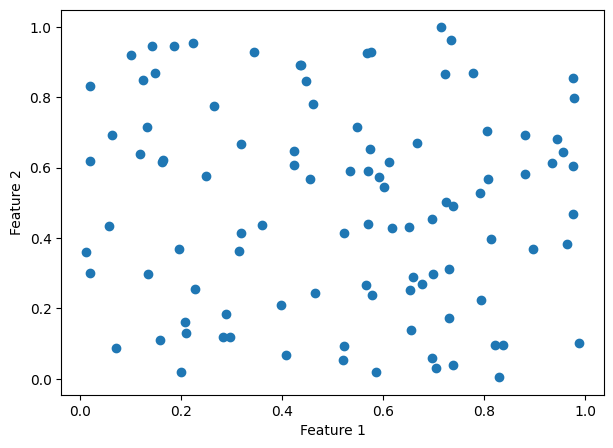

In [86]:
plt.figure(figsize=(7,5))
plt.scatter(x1[:,0],x1[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [87]:
pca_x1 = PCA(n_components=2).fit(x1)
print('PCA explained variance for x1: ',pca_x1.explained_variance_ratio_)

PCA explained variance for x1:  [0.53490112 0.46509888]


In [88]:
b = np.random.random_sample((100,2))
x2 = np.c_[b[:,0],(5*b[:,0] + 2) + b[:,1]]

In [89]:
np.corrcoef(x2,rowvar=False)

array([[1.        , 0.97763595],
       [0.97763595, 1.        ]])

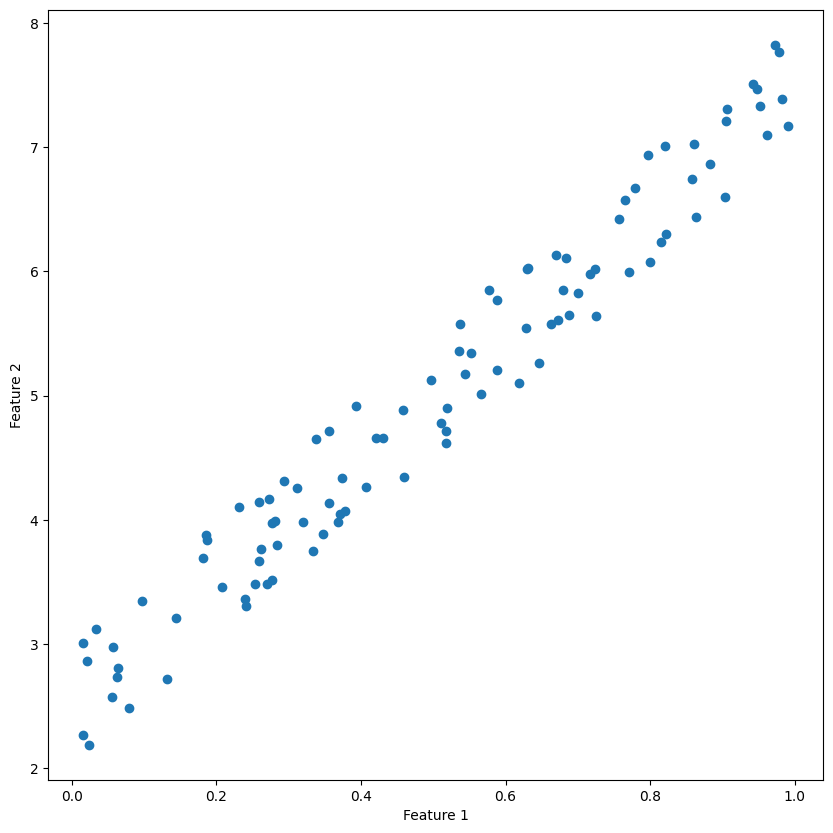

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(x2[:,0],x2[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [91]:
pca_x2 = PCA(n_components=2).fit(x2)


In [92]:
print('PCA explained variance for x2: ',pca_x2.explained_variance_ratio_)

PCA explained variance for x2:  [0.99843111 0.00156889]


In [93]:
digits = loadmat('digits012.mat')
x_data = digits['x']
y_data = digits['y'][0,:]
y_data.shape

(21770,)

In [94]:
# Randomized 70/30 split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,shuffle=True)


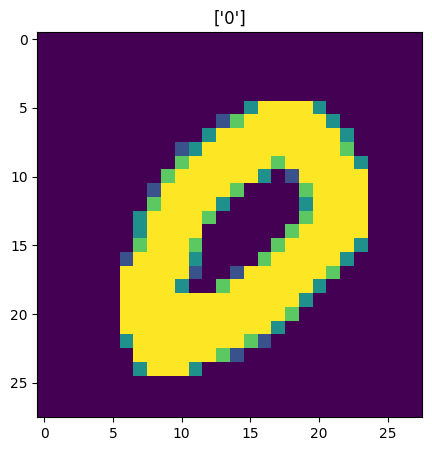

In [95]:
plt.figure(figsize=(7,5))
ind = 785
plt.imshow(x_train[ind].reshape(28,28))
plt.title(y_train[ind])
plt.show()


In [96]:
# Fit an SVM classifier
y_train[np.where(y_train == '0')[0]] = 0
y_train[np.where(y_train == '1')[0]] = 1
y_train[np.where(y_train == '2')[0]] = 2

y_test[np.where(y_test == '0')[0]] = 0
y_test[np.where(y_test == '1')[0]] = 1
y_test[np.where(y_test == '2')[0]] = 2

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [97]:
clf = SVC(C=1,kernel='rbf').fit(x_train,y_train)

In [98]:
# predict on test data
pred_test = clf.predict(x_test)

In [99]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2101
           1       1.00      1.00      1.00      2371
           2       0.99      1.00      0.99      2059

    accuracy                           1.00      6531
   macro avg       1.00      1.00      1.00      6531
weighted avg       1.00      1.00      1.00      6531



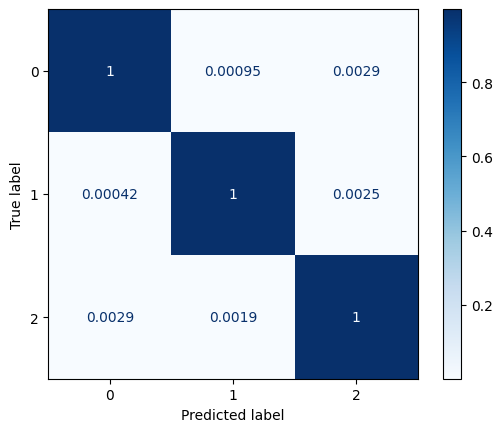

In [100]:
cm = confusion_matrix(y_test, pred_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

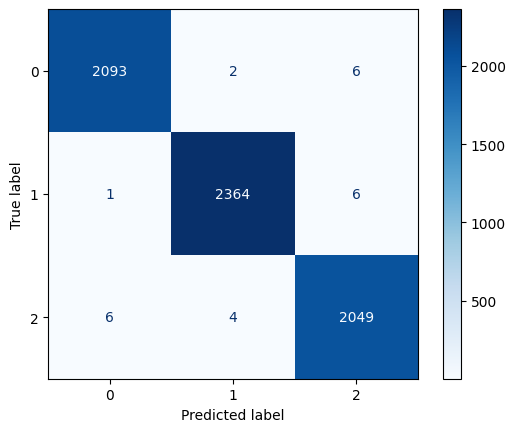

In [101]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [102]:
# Perform PCA
pca = PCA(n_components=784).fit(x_train)

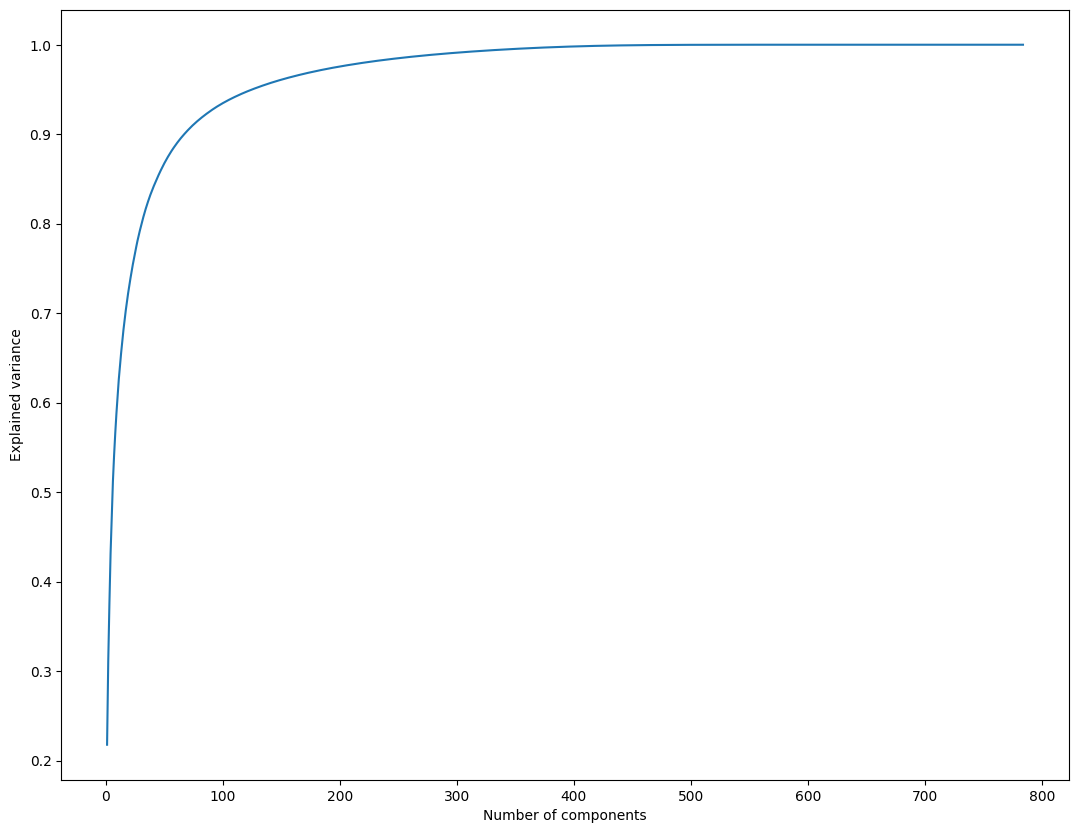

In [103]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(13,10))
plt.plot(np.arange(1,785),pca_cumsum)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [104]:
# Apply PCA transformation to the train and test datasets

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [105]:
# Select principal components that account for 95% variance

var_thr = 0.95
var_comp = np.where(pca_cumsum >= var_thr)[0]
var_comp = var_comp[0]
print('No. of required components for explaining {}% variance: {}'.format(int(var_thr*100),var_comp))

No. of required components for explaining 95% variance: 124


In [106]:
# Select only the required components
x_train_pca = x_train_pca[:,:var_comp]
x_test_pca = x_test_pca[:,:var_comp]

In [107]:
# Fit SVM classifier on new data
clf_pca = SVC(C=1,kernel='rbf').fit(x_train_pca,y_train)

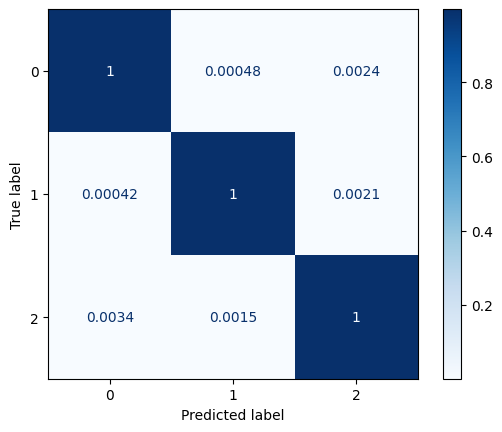

In [108]:
y_pred_pca = clf_pca.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred_pca, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

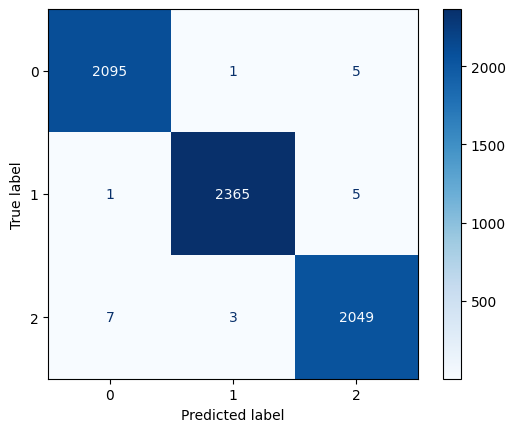

In [109]:
y_pred_pca = clf_pca.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()